In [ ]:
"""
Taylor Richardson
December 05, 2018

Followed tutorial from;
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python (Which was excellent)

To create an image recognition CNN (Convoluted Neural Network).

It uses keras and TensorFlow primarily to construct the neural net.

After adding in drop out layers it has a f1-score of 91%, which is excellent. 

Was a very fun learning exercise to see how this process when.


"""

In [2]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [4]:
print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
#Unique numbers from the training data
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes : ', classes)

Total number of outputs:  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

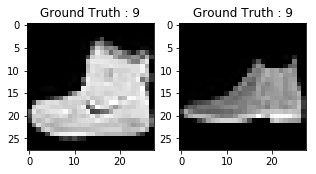

In [6]:
plt.figure(figsize=[5,5])

#Diplay the first image in the training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))

#Diplay the first image in the testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_y[0]))

In [7]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255

In [9]:
#Change the labels to one hot
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

#Display the change for category label using one-hot
print('Original label:', train_y[0])
print('After conversation to one hot ', train_y_one_hot[0])

Original label: 9
After conversation to one hot  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y_one_hot, test_size = 0.2, random_state=100)

In [11]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding ='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
__________

In [17]:
fashion_train = fashion_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(valid_x, valid_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 63s 1ms/step - loss: 0.4585 - acc: 0.8334 - val_loss: 0.3094 - val_acc: 0.8878
Epoch 2/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.2959 - acc: 0.8916 - val_loss: 0.2765 - val_acc: 0.8961
Epoch 3/20
48000/48000 [==============================] - 64s 1ms/step - loss: 0.2486 - acc: 0.9096 - val_loss: 0.2560 - val_acc: 0.9034
Epoch 4/20
48000/48000 [==============================] - 61s 1ms/step - loss: 0.2149 - acc: 0.9202 - val_loss: 0.2308 - val_acc: 0.9150
Epoch 5/20
48000/48000 [==============================] - 64s 1ms/step - loss: 0.1868 - acc: 0.9313 - val_loss: 0.2408 - val_acc: 0.9123
Epoch 6/20
48000/48000 [==============================] - 65s 1ms/step - loss: 0.1668 - acc: 0.9382 - val_loss: 0.2307 - val_acc: 0.9127
Epoch 7/20
48000/48000 [==============================] - 69s 1ms/step - loss: 0.1438 - acc: 0.9464 - val_loss: 0.2526 - val_acc

In [18]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose=0)
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.4547118291886989
Test accuracy:  0.915


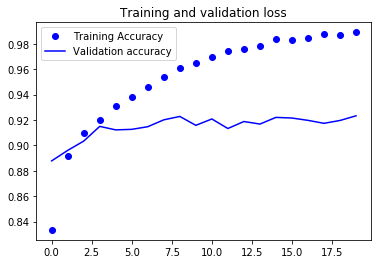

In [19]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
batch_size = 64
epochs = 20
num_classes = 10

In [22]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3,3), activation='linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3,3), activation='linear', padding ='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [23]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [24]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(),metrics = ['accuracy'])

In [28]:
fashion_train_dropout = fashion_model.fit(train_x, train_y, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(valid_x, valid_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 71s 1ms/step - loss: 0.5980 - acc: 0.7787 - val_loss: 0.3553 - val_acc: 0.8683
Epoch 2/20
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3772 - acc: 0.8630 - val_loss: 0.2861 - val_acc: 0.8910
Epoch 3/20
48000/48000 [==============================] - 83s 2ms/step - loss: 0.3298 - acc: 0.8795 - val_loss: 0.2527 - val_acc: 0.9030
Epoch 4/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3038 - acc: 0.8870 - val_loss: 0.2415 - val_acc: 0.9087
Epoch 5/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.2819 - acc: 0.8943 - val_loss: 0.2329 - val_acc: 0.9112
Epoch 6/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.2700 - acc: 0.8997 - val_loss: 0.2203 - val_acc: 0.9177
Epoch 7/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2599 - acc: 0.9036 - val_loss: 0.2298 - val_acc

In [29]:
fashion_model.save("fashion_model_dropout.h5py")

In [31]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose = 1)

10000/10000 [==============================] - 3s 348us/step


In [32]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.23133117459416389
Test accuracy:  0.9176


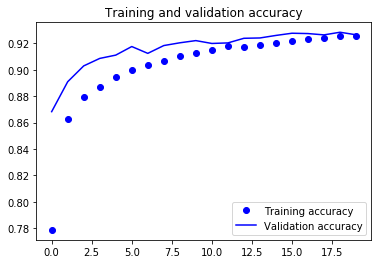

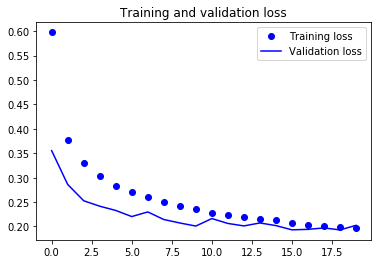

In [34]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes = fashion_model.predict(test_x)

In [36]:
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)

In [37]:
predicted_classes.shape, test_y.shape

((10000,), (10000,))

Found 9146 correct labels


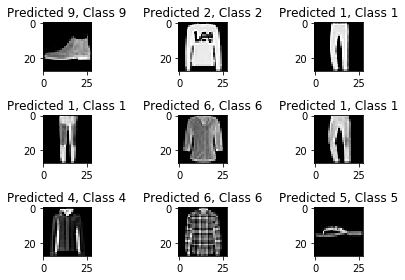

In [50]:
correct = np.where(predicted_classes==test_y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

In [51]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes,target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.77      0.93      0.84      1000
    Class 1       1.00      0.98      0.99      1000
    Class 2       0.82      0.93      0.87      1000
    Class 3       0.91      0.95      0.93      1000
    Class 4       0.91      0.82      0.86      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.87      0.63      0.73      1000
    Class 7       0.95      0.98      0.96      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.92      0.91      0.91     10000

